In [1]:
import numpy as np
import sympy as sp
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

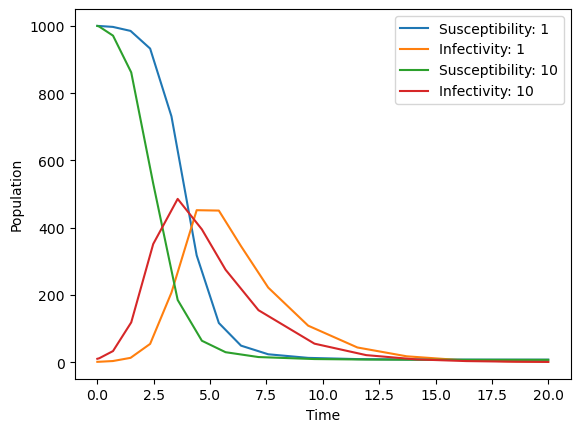

In [2]:
beta = 2.18e-3
gamma = 0.44

S= sp.symbols('S')
I=sp.symbols('I')
R=sp.symbols('R')
t=sp.symbols('t')
initsuscep=1000
infectivity_array=[1, 10]


def ode(t, y):
    S, I = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    return [dS_dt, dI_dt] 

for i in infectivity_array:

    sol = solve_ivp(ode, [0, 20], [initsuscep, i])

    plt.plot(sol.t, sol.y[0], label=f'Susceptibility: {i}')
    plt.plot(sol.t, sol.y[1], label=f'Infectivity: {i}')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

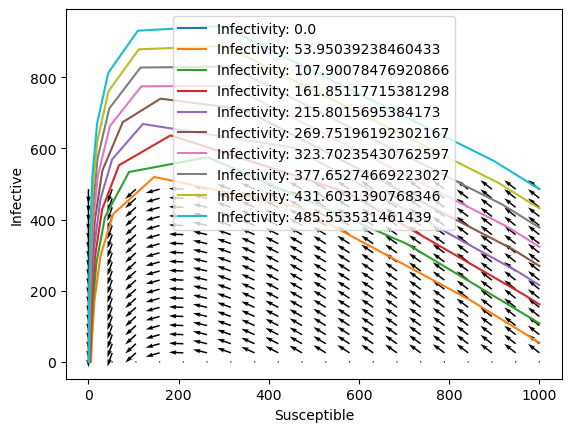

In [3]:
max_x = np.max(sol.y[0])
max_y = np.max(sol.y[1])

x = np.linspace(0, max_x, 20)
y = np.linspace(0, max_y, 20)
S, I = np.meshgrid(x, y)

slopes = ode(0, [S, I])

slopes_norm = np.linalg.norm(slopes, axis=0)
infectivity_array = np.linspace(0, max_y, 10)

snorm=slopes[0]/(slopes_norm+0.000000000001)
inorm=slopes[1] /(slopes_norm+0.00000000001)
plt.quiver(S, I, snorm, inorm)

for i in infectivity_array:
    sol = solve_ivp(ode, [0, 20], [initsuscep, i])
    plt.plot(sol.y[0], sol.y[1], label=f'Infectivity: {i}')

plt.xlabel('Susceptible')
plt.ylabel('Infective')
plt.legend()

plt.show()

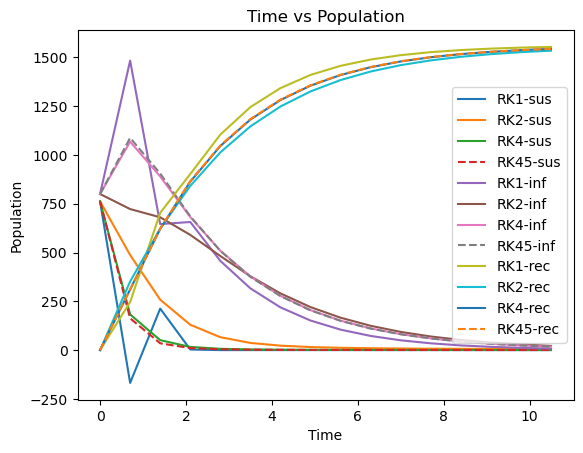

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import sympy as sp


def ode(t,init,beta,gamma):
    S,I,R=init
    dS=-beta*S*I
    dI=beta*S*I-gamma*I
    dR=gamma*I
    return [dS,dI,dR]


def rk1(ode,t,init,beta,gamma,h):
    sol=np.zeros((len(t),len(init)))
    sol[0]=init
    for i in range(1,len(t)):
        sol[i]=sol[i-1]+h*np.array(ode(t[i-1],sol[i-1],beta,gamma))
    return sol



def rk2(ode,t,init,beta,gamma,h):
    sol=np.zeros((len(t),len(init)))
    sol[0]=init
    for i in range(1,len(t)):
        k1=np.array(ode(t[i-1],sol[i-1],beta,gamma))
        k2=np.array(ode(t[i-1]+h,sol[i-1]+h*k1,beta,gamma))
        sol[i]=sol[i-1]+h*(k1+k2)/2
    return sol



def rk4(ode,t,init,beta,gamma,h):
    sol=np.zeros((len(t),len(init)))
    sol[0]=init
    for i in range(1,len(t)):
        k1=np.array(ode(t[i-1],sol[i-1],beta,gamma))
        k2=np.array(ode(t[i-1]+h/2,sol[i-1]+h*k1/2,beta,gamma))
        k3=np.array(ode(t[i-1]+h/2,sol[i-1]+h*k2/2,beta,gamma))
        k4=np.array(ode(t[i-1]+h,sol[i-1]+h*k3,beta,gamma))
        sol[i]=sol[i-1]+h/6*(k1+2*k2+2*k3+k4)
    return sol


y,t=sp.symbols("y t")
beta=0.00218
gamma=0.44
init=[762,800,0]
interval=[0,10.5]
h=0.7
t_space=np.arange(interval[0],interval[1],h)
sol_rk1=rk1(ode,t_space,init,beta,gamma,h)
sol_rk2=rk2(ode,t_space,init,beta,gamma,h)
sol_rk4=rk4(ode,t_space,init,beta,gamma,h)



arr=lambda t,init:[(-beta*init[0]*init[1]),((beta*init[0]*init[1])-gamma*init[1]),(gamma*init[1])]
#storing variable as values for rk45
sol_rk45=solve_ivp(arr,interval,init,method="RK45",t_eval=t_space)

plt.plot(t_space,sol_rk1[:,0],label="RK1-sus")
plt.plot(t_space,sol_rk2[:,0],label="RK2-sus")
plt.plot(t_space,sol_rk4[:,0],label="RK4-sus")
plt.plot(sol_rk45.t,sol_rk45.y[0],label="RK45-sus",ls='--')
plt.plot(t_space,sol_rk1[:,1],label="RK1-inf")
plt.plot(t_space,sol_rk2[:,1],label="RK2-inf")
plt.plot(t_space,sol_rk4[:,1],label="RK4-inf")
plt.plot(sol_rk45.t,sol_rk45.y[1],label="RK45-inf",ls='--')
plt.plot(t_space,sol_rk1[:,2],label="RK1-rec")
plt.plot(t_space,sol_rk2[:,2],label="RK2-rec")
plt.plot(t_space,sol_rk4[:,2],label="RK4-rec")
plt.plot(sol_rk45.t,sol_rk45.y[2],label="RK45-rec",ls='--')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Time vs Population")
plt.legend()
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
sp.init_printing()

#Defining variables
y=[762,800,0]
S=sp.Function("S")
I=sp.Function("I")
R=sp.Function("R")
t=sp.symbols("t")
g=sp.symbols("g")
b=0

dS_dt=sp.Eq(S(t).diff(t),-b*S(t)*I(t))
dI_dt=sp.Eq(I(t).diff(t),b*S(t)*I(t)-g*I(t))
dR_dt=sp.Eq(R(t).diff(t),g*I(t))
sol1=sp.dsolve([dS_dt,dI_dt,dR_dt],ics={S(0):762,I(0):800,R(0):0})
sol1

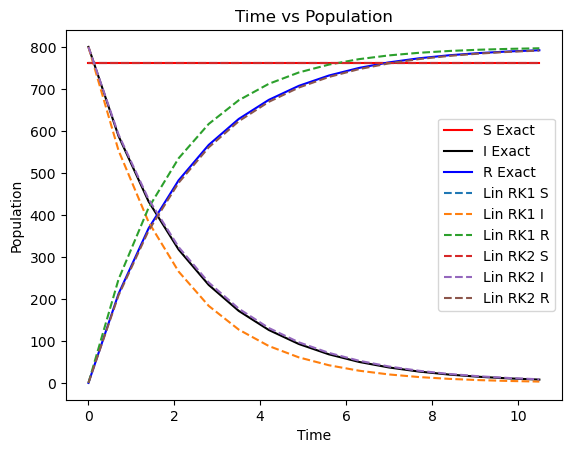

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

interval=[0,10.5]
h=0.7
t_space=np.arange(interval[0],interval[1],h)
b=0
g=0.44
y=[762,800,0]
t=sp.Symbol("t")

dS=sp.Eq(S(t).diff(t),-b*S(t)*I(t))
dI=sp.Eq(I(t).diff(t),b*S(t)*I(t)-g*I(t))
dR=sp.Eq(R(t).diff(t),g*I(t))

sol1=sp.dsolve([dS,dI,dR],[S(t),I(t),R(t)],ics={S(0):762,I(0):800,R(0):0})

sol=[[],[],[]]
for i in t_space:
    sol[0].append(sol1[0].rhs.subs({t:i}))
    sol[1].append(sol1[1].rhs.subs({t:i}))
    sol[2].append(sol1[2].rhs.subs({t:i}))

plt.plot(t_space,sol[0],color='red',label="S Exact")
plt.plot(t_space,sol[1],color='black',label="I Exact")
plt.plot(t_space,sol[2],color='blue',label="R Exact")

arr=lambda t,y:[(-b*y[0]*y[1]),((b*y[0]*y[1])-g*y[1]),(g*y[1])]
sol_l=solve_ivp(arr,interval,y,method="RK45",t_eval=t_space)


def sys_de(t,y,b,g):
    S,I,R=y
    dS=-b*S*I
    dI=b*S*I-g*I
    dR=g*I
    return [dS,dI,dR]

def rk1(sys,t,y,b,g,h):
    sol=np.zeros((len(t),len(y)))
    sol[0]=y
    for i in range(1,len(t)):
        sol[i]=sol[i-1]+h*np.array(sys(t[i-1],sol[i-1],b,g))
    return sol

def rk2(sys,t,y,b,g,h):
    sol=np.zeros((len(t),len(y)))
    sol[0]=y
    for i in range(1,len(t)):
        k1=np.array(sys(t[i-1],sol[i-1],b,g))
        k2=np.array(sys(t[i-1]+h,sol[i-1]+h*k1,b,g))
        sol[i]=sol[i-1]+h*(k1+k2)/2
    return sol

sol_rk1=rk1(sys_de,t_space,y,b,g,h)
sol_rk2=rk2(sys_de,t_space,y,b,g,h)
plt.plot(t_space,sol_rk1[:,0],label="Lin RK1 S",ls='--')
plt.plot(t_space,sol_rk1[:,1],label="Lin RK1 I",ls='--')
plt.plot(t_space,sol_rk1[:,2],label="Lin RK1 R",ls='--')
plt.plot(t_space,sol_rk2[:,0],label="Lin RK2 S",ls='--')
plt.plot(t_space,sol_rk2[:,1],label="Lin RK2 I",ls='--')
plt.plot(t_space,sol_rk2[:,2],label="Lin RK2 R",ls='--')

plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Time vs Population")
plt.legend()
plt.show()

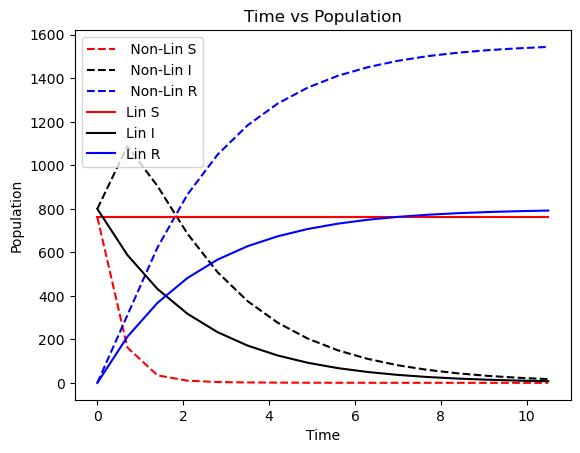

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

#Defining variables
interval=[0,10.5]
h=0.7
t_space=np.arange(interval[0],interval[1],h)
b=2.18*(10**(-3))
g=0.44
y=[762,800,0]

arr=lambda t,y:[(-b*y[0]*y[1]),((b*y[0]*y[1])-g*y[1]),(g*y[1])]
sol_nl=solve_ivp(arr,interval,y,method="RK45",t_eval=t_space)

plt.plot(sol_rk45.t,sol_nl.y[0],color='red',ls='--',label=" Non-Lin S")
plt.plot(sol_rk45.t,sol_nl.y[1],color='black',ls='--',label=" Non-Lin I")
plt.plot(sol_rk45.t,sol_nl.y[2],color='blue',ls='--',label=" Non-Lin R")

b=0

arr=lambda t,y:[(-b*y[0]*y[1]),((b*y[0]*y[1])-g*y[1]),(g*y[1])]
sol_l=solve_ivp(arr,interval,y,method="RK45",t_eval=t_space)

plt.plot(sol_rk45.t,sol_l.y[0],color='red',label="Lin S")
plt.plot(sol_rk45.t,sol_l.y[1],color='black',label="Lin I")
plt.plot(sol_rk45.t,sol_l.y[2],color='blue',label="Lin R")

plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Time vs Population")
plt.legend()
plt.show()